In [1]:
%cd ..
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from melp import Detector
import melp
import math
import random
from glob import glob

from melp.clustering.misc import*
import melp.clustering as clump
import melp.clustering.time_cluster as tclump
#from melp import TileAnalyzer
import melp.clustering.spatial_cluster as sclump
import melp.clustering.plots as clump_plt
import melp.clustering.three_frame_cluster as clump_3

plt.rcParams.update({'font.size': 16})

/home/erik/GitHub/melp
Welcome to JupyROOT 6.24/06


In [2]:
time_threshold_used = 1.2
threshold_cluster_width_used = 20 

function_str = "mt_compare_to_tid"
src = "./testdata/sorted/root_files_fixed/mu3e_sorted_000*.root"

args = (time_threshold_used, threshold_cluster_width_used, "big", None, "timetheniterativespatial")

clump.multithreading.run_mt(function_str, src, args)

-----------------------
Available threads =  8
Used threads =  5
-----------------------
read file read file read file    7read file 1read file 9

 
started thread 5 started thread started thread  3  71
9

started thread  

3started thread 
 5
read file  8
started thread  8
read file  6
started thread  6
read file  4
started thread  4
read file  10
started thread  10
read file  2
started thread  2
read file  11
started thread  11
read file  13
started thread  13
read file  15
started thread  15
read file  17
started thread  17
read file  19
started thread  19
read file  12
started thread  12
read file  18
started thread  18
read file  14
started thread  14
read file  16
started thread  16
read file  20
started thread  20
read file  21
started thread  21
read file  23
started thread  23
read file  25
started thread  25
read file  27
started thread  27
read file  29
started thread  29
read file  22
started thread  22
read file  28
started thread  28
read file  read file 24 26

started th

In [3]:
src2 = "./melp/clustering/results"

src_frac_corr_frame          = src2 + "/frac_corr_frame_tid_*.txt"
src_frac_corr_clusters_frame = src2 + "/frac_corr_clusters_frame_tid_*.txt"
src_frac_uncorr_frame        = src2 + "/frac_uncorr_frame_tid_*.txt"
src_efficiency_stats         = src2 + "/efficiency_stats_tid_*.txt"

fnames_frac_corr_frame           = glob(src_frac_corr_frame)
fnames_frac_corr_clusters_frame  = glob(src_frac_corr_clusters_frame)
fnames_frac_uncorr_frame         = glob(src_frac_uncorr_frame)
fnames_efficiency_stats          = glob(src_efficiency_stats)

array_frac_corr_frame          = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_frame])
array_frac_corr_clusters_frame = np.concatenate([np.loadtxt(f) for f in fnames_frac_corr_clusters_frame])
array_frac_uncorr_frame        = np.concatenate([np.loadtxt(f) for f in fnames_frac_uncorr_frame])
#array_efficiency_stats         = np.concatenate([np.loadtxt(f) for f in fnames_efficiency_stats])

## Efficiency statistics

In [4]:
for f in fnames_efficiency_stats:
    print("File: " + f)
    with open(f, "r", encoding="utf-8") as file:
        for line in file:
            print(line.strip())
    print("\n")

File: ./melp/clustering/results/efficiency_stats_tid_147.txt
Number of analyzed frames:  1000 Number of correct counter fractions:  1000
Total number of hits = 31467 , Identified correctly + identified incorrectly = 31466
Identified correctly: 27787
Identified incorrectly: 3679
Total #hits in frames/#hits in clusters =  1.000031780334329
Total number of clusters: 17868 , Hits: 31467
Number of clusters with hits that are far apart in time: 62
Number of clusters where tid already exists: 8798 , Hits: 15183
Number of clusters where tid already exists, that are accounted for: 8798
Correctly associated out of all hits:  88.30520863126449 %
Correctly associated out of all hits in clusters:  88.3080150003178 %
Incorrectly associated out of all hits:  11.691613436298343 %
Incorrectly associated out of all hits in clusters:  11.691984999682196 %


File: ./melp/clustering/results/efficiency_stats_tid_164.txt
Number of analyzed frames:  1000 Number of correct counter fractions:  1000
Total number

## Efficiency plots

### Hits associated to wrong cluster

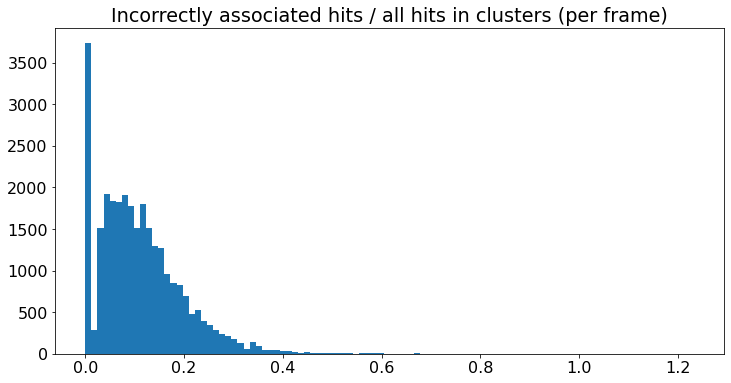

In [5]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_uncorr_frame, bins = 100)
plt.title("Incorrectly associated hits / all hits in clusters (per frame)")
plt.show()

### Hits associated to correct cluster

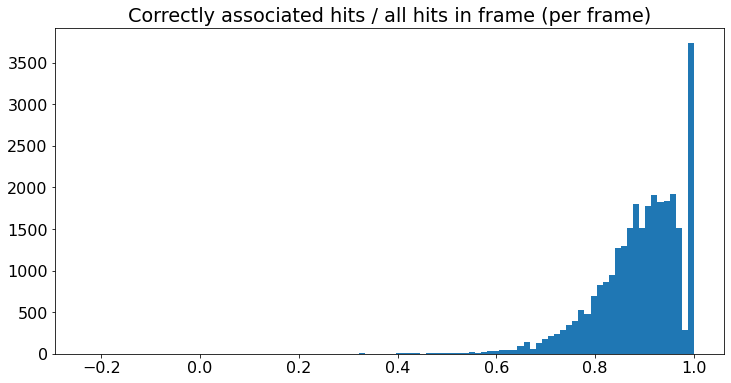

In [6]:
fig = plt.figure(figsize=(12,6))
plt.hist(array_frac_corr_frame, bins = 100)
plt.title("Correctly associated hits / all hits in frame (per frame)")
plt.show()